# Imports

In [17]:
import numpy as np
import pandas as pd
import json
from scipy.optimize import curve_fit, brentq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import uncertainties.unumpy as unp
import uncertainties as unc

# Functions

In [18]:
def exponential(x, a, b):
    return a * np.exp(b * x)

def weighted_exp_fit(y, cut=8, weights='linear'):
    days = len(y)
    y = y[y > 0]
    delta = days - len(y)
    x = np.arange(delta, days) #just take the x with y(x) > 0
    weights = np.ones(cut) #uniform weights
    if weights == 'linear':
        weights = np.arange(1, cut+1)
    y_fit = y[len(y)-cut:]
    x_fit = x[len(x)-cut:]
    sigma = np.sqrt(y_fit) / weights #linear weights become quadratic as in the least squares method a sigma^2 appears
    popt, pcov = curve_fit(exponential, x_fit, y_fit, sigma=sigma)
    return popt, pcov

# Data

In [19]:
df_regions = pd.read_json('../pcm-dpc-COVID-19/dati-json/dpc-covid19-ita-regioni.json')
df_pop = pd.read_csv('dati_regioni.csv')

# Local exponential fit — Italian regions

In [34]:
#creating a new minimalist dataframe
df_temp = df_regions[df_regions.data == max(df_regions.data.values)]
df_temp = df_temp[df_temp.denominazione_regione != '']
df_forecast = df_temp[['data', 'codice_regione', 'denominazione_regione']].copy()

In [35]:
df_forecast.head()

,data,codice_regione,denominazione_regione
441,2020-03-16 17:00:00,13,Abruzzo
442,2020-03-16 17:00:00,17,Basilicata
443,2020-03-16 17:00:00,4,P.A. Bolzano
444,2020-03-16 17:00:00,18,Calabria
445,2020-03-16 17:00:00,15,Campania


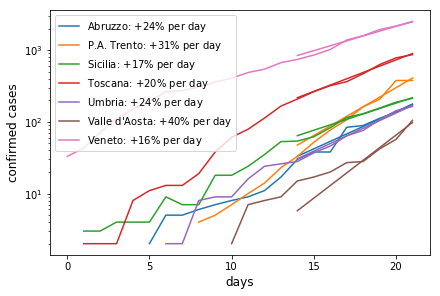

In [10]:
fig, ax = plt.subplots(constrained_layout=True)

denominazioni = np.unique(df_regions.denominazione_regione.values[15:22])
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'black', 'tab:olive',
          'tab:cyan', 'b', 'g', 'm', 'chocolate',
          'lime', 'salmon', 'teal', 'darkred', 'indigo',
          'crimson'] #21 colori per VENTI regioni (mannaggia al Trentino - Alto Adige)

df_regions_forecast = 
for i, den in enumerate(denominazioni):
    dfr = df_regions[df_regions.denominazione_regione == den]
    y = dfr.totale_casi.values
    popt, pcov = weighted_exp_fit(y, cut=8, weights='linear')
    a, b = unc.correlated_values(popt, pcov)
    slope = unc.nominal_value(b)
    std = unc.std_dev(b)
    
    label = '{}: $+${}% per day'.format(den, int(round(slope, 2)*100))
    ax.plot(x_fit, exponential(x_fit, *popt), color=colors[i])
    ax.plot(x, y, color=colors[i], label=label)
    
ax.set_yscale('log')
ax.set_ylabel('confirmed cases', fontsize='large')
ax.set_xlabel('days', fontsize='large')
ax.legend(loc=0)

fig.savefig('plot/LocalExp-regions.png', dpi = 300)